# jammer
## 10- debugging the weird models
### I. Run01


In [1]:
import pandas as pd

In [2]:
dat1 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/models_draw.csv')

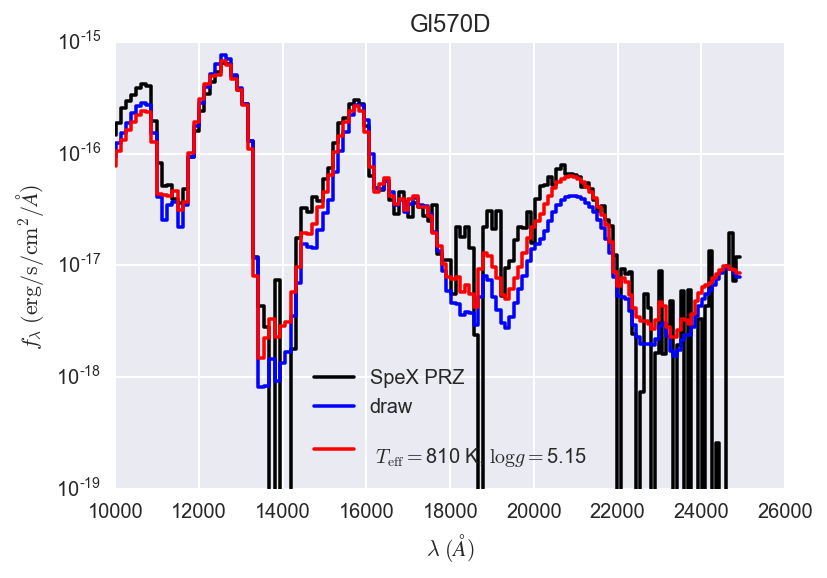

In [3]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('log')

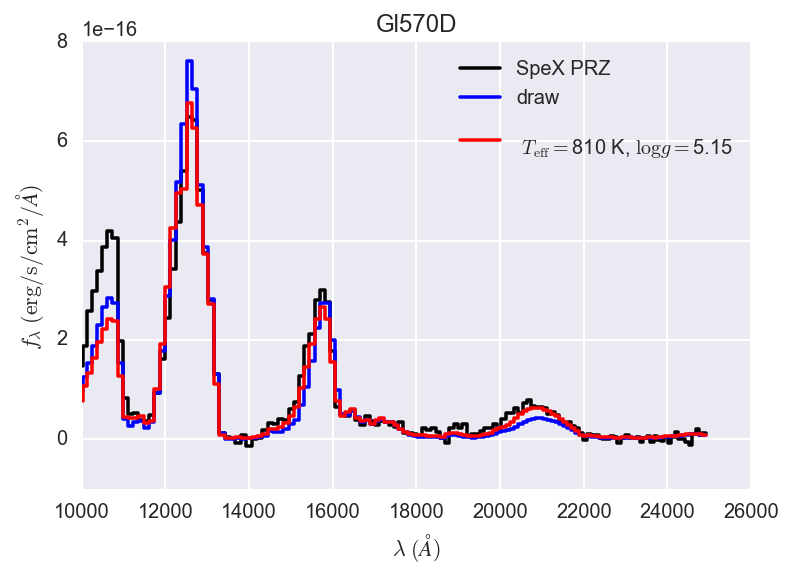

In [4]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')

Is my logOmega way off?  What should $\Omega$ be?  
$\Omega \equiv r^2/d^2$

In [5]:
import astropy.constants as C

In [6]:
d = 1.0/0.1693

In [7]:
d #pc

5.9066745422327225

In [8]:
np.log10((1.0*C.R_jup/(d*C.pc))**2)

<Quantity -18.812872280833922>

logOmega is in the right vicinity! :)

In [9]:
import astropy.units as u

In [10]:
dat1.columns

Index(['data', 'wl', 'model_composite'], dtype='object')

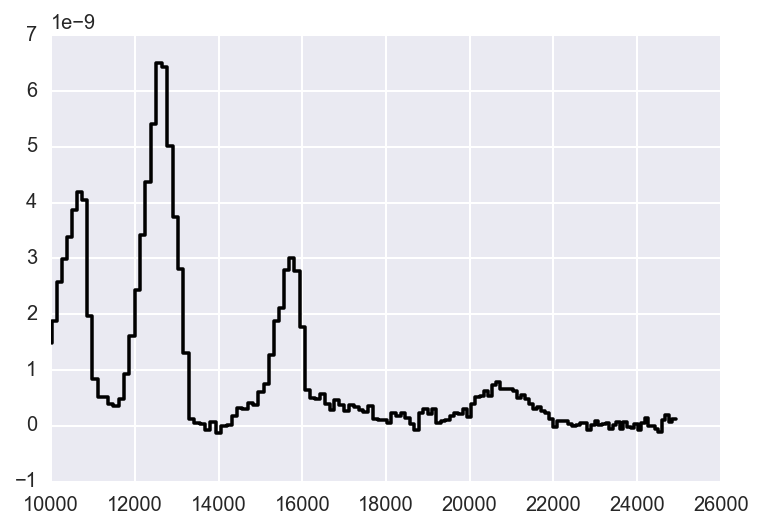

In [11]:
dat_scl = (dat1.data.values*u.erg/u.s/u.cm**2/u.Angstrom).to(u.Watt/u.m**2/u.m).value
plt.step(dat1.wl, dat_scl, 'k', label='SpeX PRZ')

Matches Line et al. Figure 3 panel 5 units.

## Could the problem be in a too-strong GP `logAmp`?
I think this is the problem!

In [12]:
resid = dat1.data - dat1.model_composite

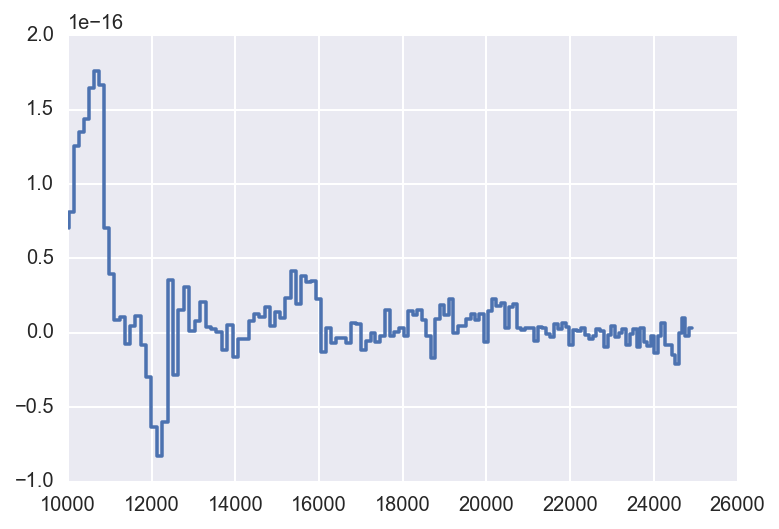

In [13]:
plt.step(dat1.wl, resid)

The absolute scale on the residual is tiny!

In [14]:
from scipy.stats import multivariate_normal

In [15]:
CC = np.load('../sf/Gl570D/output/marley_grid/run01/CC_new.npy')

In [16]:
#import h5py
#ff = h5py.File('../data/reduced/Gl570D.hdf5')
#list(ff.keys())
#ff.close()

In [17]:
draw = multivariate_normal(dat1.model_composite, CC)

In [18]:
np.max(CC.diagonal()),np.min(CC.diagonal())

(3.1972301287278676e-33, 2.6639955265148879e-33)

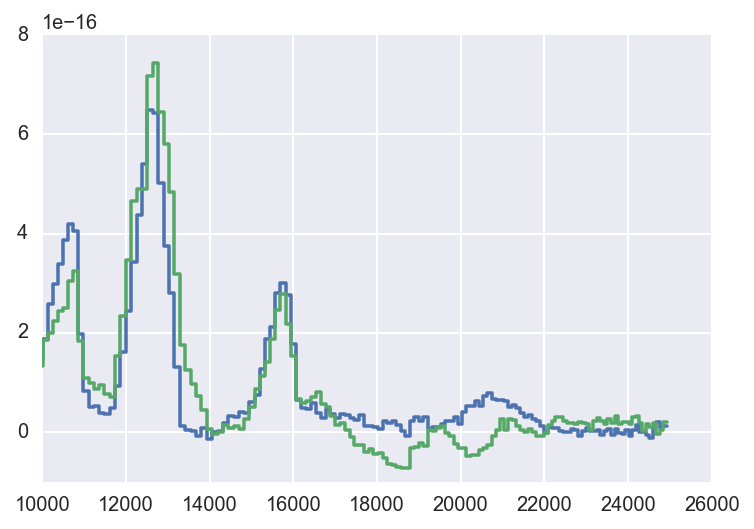

In [19]:
plt.step(dat1.wl, dat1.data)
plt.step(dat1.wl, draw.rvs())

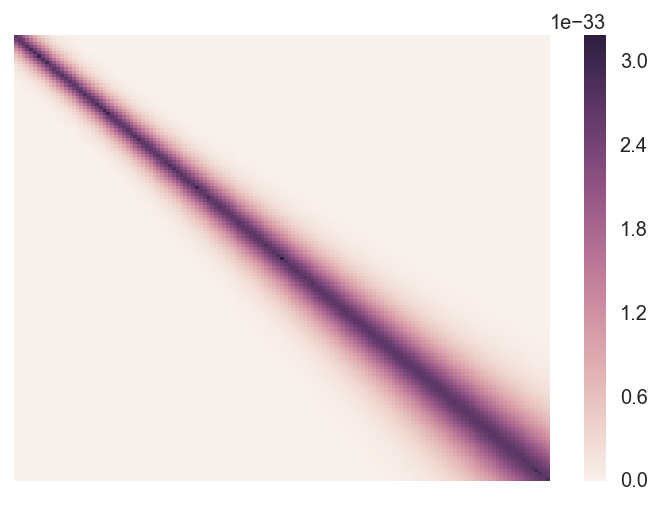

In [20]:
sns.heatmap(CC, xticklabels=False, yticklabels=False)

Looks like the answer is yes, our `logAmp` was too strong!  We want $\log(\alpha) \sim -17.0$

### The end.